# Lead Scoring Case Study

### Problem Statement

###### Company X Education is an online education plateform which specialises in selling online courses to industry professionals. The company has its course on various various websites and search engines. People who fill up details related to them (such as name, phone number, email address etc) or are referred by other clients are considered as leads (potential clients). X Education receives plenty of leads, however the leads being converted into clients is extremely low. In a 100 leads per day, only 30 of them are converted to clients.

### Goals of the Case Study
##### Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

In [1252]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler

In [1253]:
#importing dataset

leads=pd.read_csv("C:\\Users\\Manuj Tyagi\\OneDrive\\Desktop\\Leads.csv")
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [1254]:
leads.shape

(9240, 37)

In [1255]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [1256]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## EXPLORATORY DATA ANALYSIS

### Data understanding, preparation

In [1257]:
#check for duplicates

sum(leads.duplicated(subset = 'Prospect ID')) == 0
sum(leads.duplicated(subset = 'Lead Number')) == 0

True

No duplicate values found in Prospect ID & Lead Number
Prospect ID & Lead Number are two variables that are just indicative of the ID number of the approched People so can be dropped.

In [1258]:
#dropping Lead Number and Prospect ID since they have all unique values

leads.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [1259]:
#Converting 'Select' values to NaN.

leads = leads.replace('Select', np.nan)

In [1260]:
#checking null values in each rows

leads.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [1261]:
#checking percentage of null values in each column

round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [1262]:
#dropping cols with more than 45% missing values

cols=leads.columns

for i in cols:
    if((100*(leads[i].isnull().sum()/len(leads.index))) >= 45):
        leads.drop(i, 1, inplace = True)

In [1263]:
#checking null values percentage

round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

### Categorical Attributes Analysis:

In [1264]:
#checking value counts of Country column

leads['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

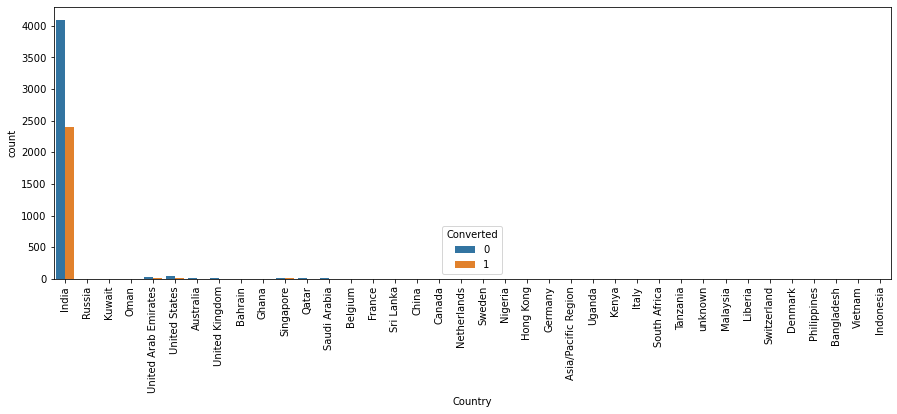

In [1265]:
#plotting spread of Country columnn 
plt.figure(figsize=(15,5))
s1=sns.countplot(leads.Country, hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

As we can see the Number of Values for India are quite high (about 97% of the Data), this column can be dropped

In [1266]:
#creating a list of columns to be droppped

cols_to_drop=['Country']

In [1267]:
#checking value counts of "City" column

leads['City'].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [1268]:
leads['City'] = leads['City'].replace(np.nan,'Mumbai')

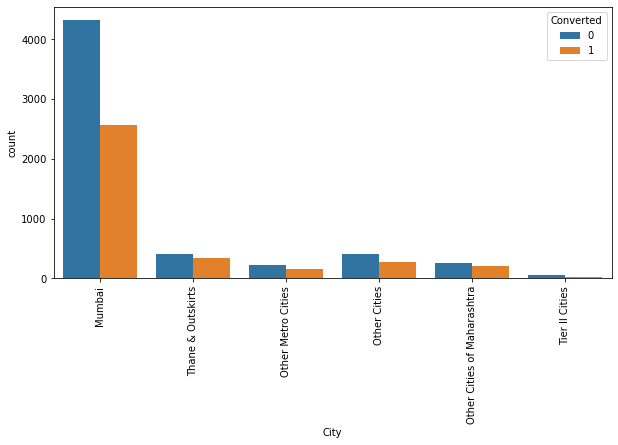

In [1269]:
#plotting spread of City columnn after replacing NaN values

plt.figure(figsize=(10,5))
s1=sns.countplot(leads.City, hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [1270]:
#checking value counts of Specialization column

leads['Specialization'].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

Lead may not have mentioned specialization because it was not in the list or maybe they are a students and don't have a specialization yet. So we will replace NaN values here with 'Not Specified'

In [1271]:
leads['Specialization'] = leads['Specialization'].replace(np.nan, 'Not Specified')

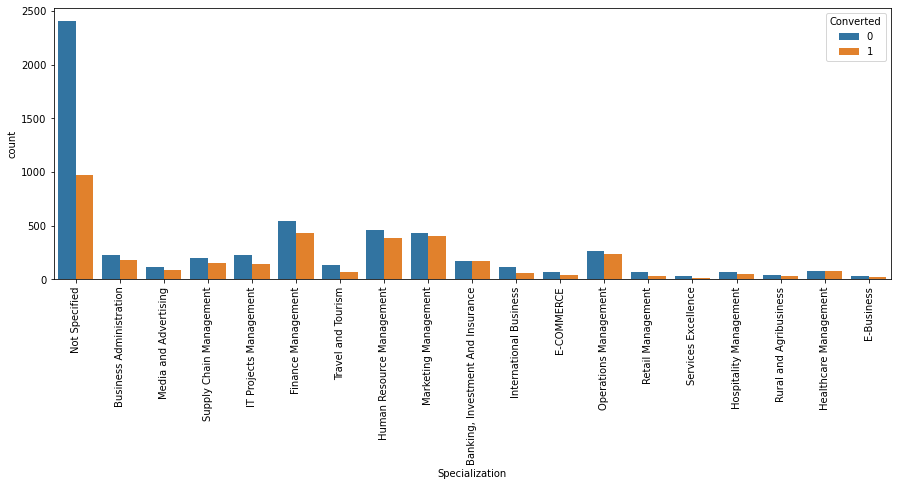

In [1272]:
#plotting spread of Specialization columnn 

plt.figure(figsize=(15,5))
s1=sns.countplot(leads.Specialization, hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

as We see that specialization with Management in them have higher number of leads as well as leads converted. So this is definitely a significant variable and should not be dropped.

In [1273]:
#combining Management Specializations because they show similar trends

leads['Specialization'] = leads['Specialization'].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                    'Healthcare Management','Hospitality Management',
                                                           'Retail Management'] ,'Management_Specializations')  

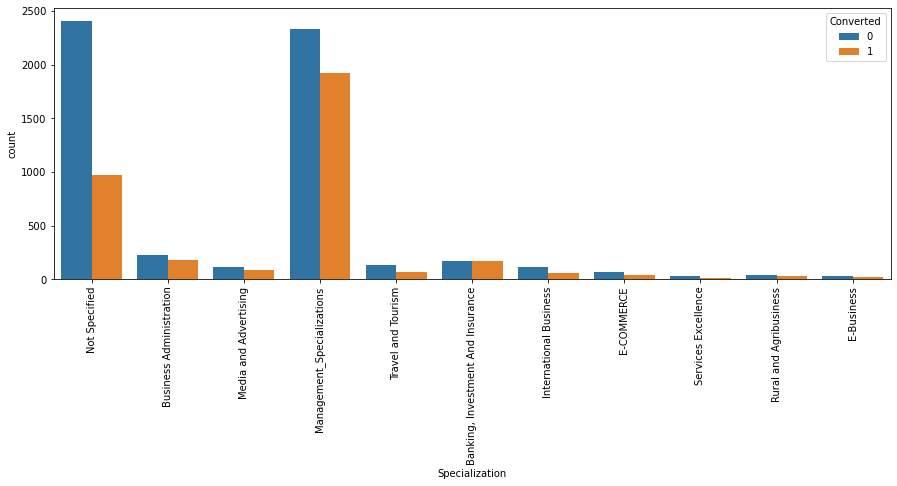

In [1274]:
#visualizing count of Variable based on Converted value


plt.figure(figsize=(15,5))
s1=sns.countplot(leads.Specialization, hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [1275]:
#What is your current occupation

leads['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [1276]:
#imputing Nan values with mode "Unemployed"

leads['What is your current occupation'] = leads['What is your current occupation'].replace(np.nan, 'Unemployed')

In [1277]:
#checking count of values
leads['What is your current occupation'].value_counts(dropna=False)

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

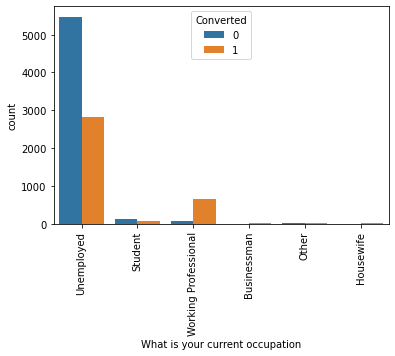

In [1278]:
#visualizing count of Variable based on Converted value

s1=sns.countplot(leads['What is your current occupation'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

Working Professionals going for the course have high chances of joining it and Unemployed leads are the most in terms of Absolute numbers.

In [1279]:
#checking value counts

leads['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [1280]:
#replacing Nan values with Mode "Better Career Prospects"

leads['What matters most to you in choosing a course'] = leads['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

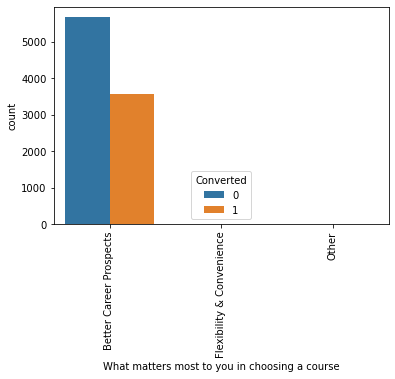

In [1281]:
#visualizing count of Variable based on Converted value

s1=sns.countplot(leads['What matters most to you in choosing a course'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [1282]:
#checking value counts of variable
leads['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [1283]:
#Here again we have another Column that is worth Dropping. So we Append to the cols_to_drop List
cols_to_drop.append('What matters most to you in choosing a course')
cols_to_drop

['Country', 'What matters most to you in choosing a course']

In [1284]:
#checking value counts of Tag variable
leads['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [1285]:
#replacing Nan values with "Not Specified"
leads['Tags'] = leads['Tags'].replace(np.nan,'Not Specified')

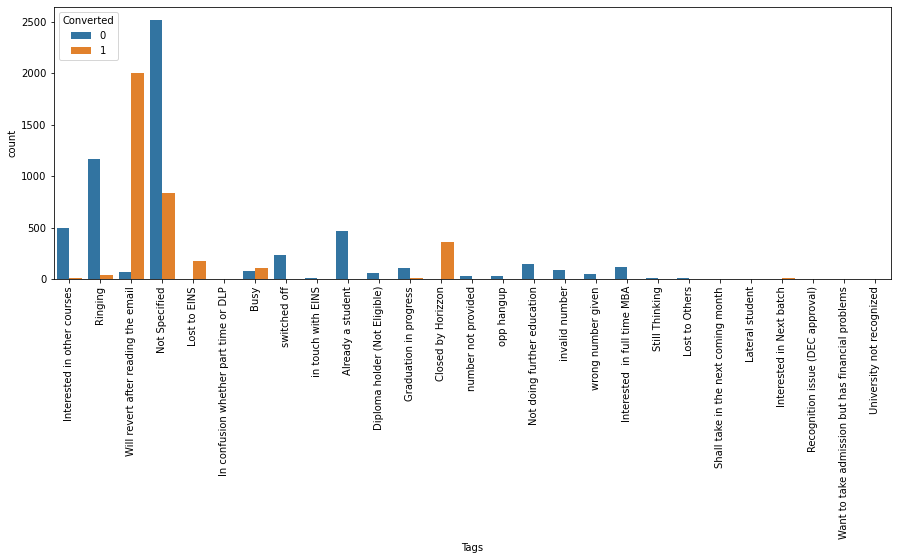

In [1286]:
#visualizing count of Variable based on Converted value

plt.figure(figsize=(15,5))
s1=sns.countplot(leads['Tags'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [1287]:
#replacing tags with low frequency with "Other Tags"
leads['Tags'] = leads['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')

leads['Tags'] = leads['Tags'].replace(['switched off',
                                      'Already a student',
                                       'Not doing further education',
                                       'invalid number',
                                       'wrong number given',
                                       'Interested  in full time MBA'] , 'Other_Tags')

In [1288]:
#checking percentage of missing values
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                    0.00
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [1289]:
#checking value counts of Lead Source column

leads['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [1290]:
#replacing Nan Values and combining low frequency values
leads['Lead Source'] = leads['Lead Source'].replace(np.nan,'Others')
leads['Lead Source'] = leads['Lead Source'].replace('google','Google')
leads['Lead Source'] = leads['Lead Source'].replace('Facebook','Social Media')
leads['Lead Source'] = leads['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM'] ,'Others') 

We can group some of the lower frequency occuring labels under a common label 'Others'

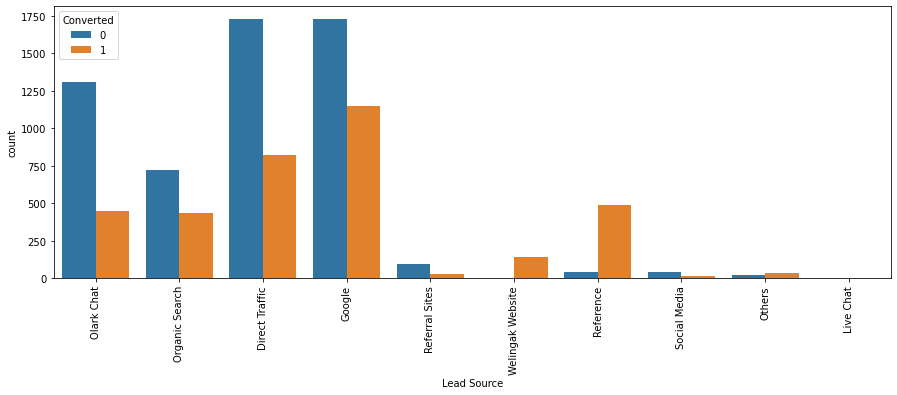

In [1291]:
#visualizing count of Variable based on Converted value
plt.figure(figsize=(15,5))
s1=sns.countplot(leads['Lead Source'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()


#### Inference

1.Maximum number of leads are generated by Google and Direct traffic.

2.Conversion Rate of reference leads and leads through welingak website is high.

3.To improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search, direct traffic, and google leads and generate more leads from reference and welingak website.

In [1292]:
# Last Activity:

leads['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [1293]:
#replacing Nan Values and combining low frequency values

leads['Last Activity'] = leads['Last Activity'].replace(np.nan,'Others')
leads['Last Activity'] = leads['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                        'Had a Phone Conversation', 
                                                        'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')

In [1294]:
# Last Activity:

leads['Last Activity'].value_counts(dropna=False)

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Others                        308
Email Link Clicked            267
Form Submitted on Website     116
Name: Last Activity, dtype: int64

In [1295]:
#Check the Null Values in All Columns:
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     0.00
Country                                          26.63
Specialization                                    0.00
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [1296]:
#Drop all rows which have Nan Values. Since the number of Dropped rows is less than 2%, it will not affect the model
leads = leads.dropna()

In [1297]:
#Checking percentage of Null Values in All Columns:
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

In [1298]:
#Lead Origin
leads['Lead Origin'].value_counts(dropna=False)

Landing Page Submission    4850
API                        1902
Lead Add Form                27
Name: Lead Origin, dtype: int64

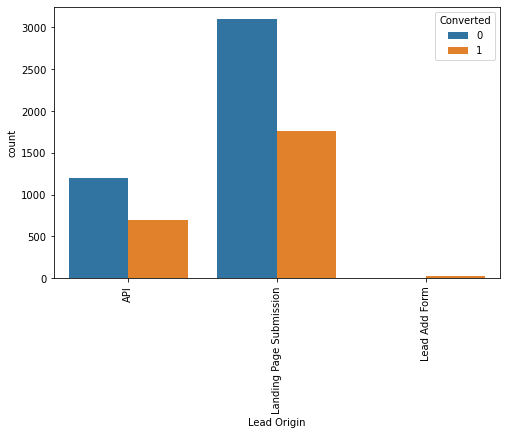

In [1299]:
#visualizing count of Variable based on Converted value

plt.figure(figsize=(8,5))
s1=sns.countplot(leads['Lead Origin'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()


#### Inference

1.API and Landing Page Submission bring higher number of leads as well as conversion.

2.Lead Add Form has a very high conversion rate but count of leads are not very high.

3.Lead Import and Quick Add Form get very few leads.

4.In order to improve overall lead conversion rate, we have to improve lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.

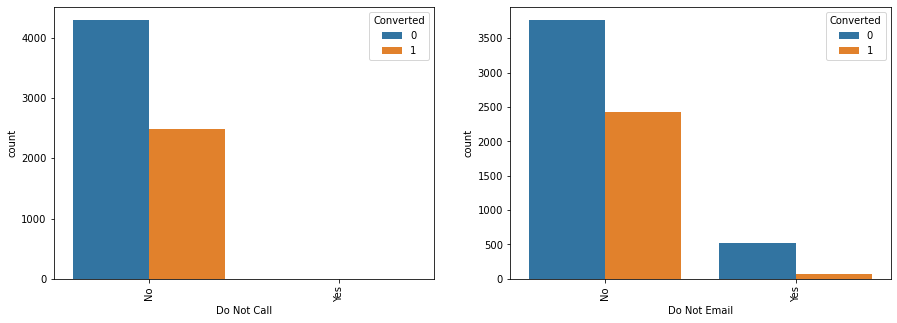

In [1300]:
#Do Not Email & Do Not Call
#visualizing count of Variable based on Converted value

plt.figure(figsize=(15,5))

ax1=plt.subplot(1, 2, 1)
ax1=sns.countplot(leads['Do Not Call'], hue=leads.Converted)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)

ax2=plt.subplot(1, 2, 2)
ax2=sns.countplot(leads['Do Not Email'], hue=leads.Converted)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
plt.show()

In [1301]:
#checking value counts for Do Not Call
leads['Do Not Call'].value_counts(dropna=False)

No     6778
Yes       1
Name: Do Not Call, dtype: int64

In [1302]:
#checking value counts for Do Not Email
leads['Do Not Email'].value_counts(dropna=False)

No     6186
Yes     593
Name: Do Not Email, dtype: int64

We Can append the Do Not Call Column to the list of Columns to be Dropped since > 90% is of only one Value

In [1303]:
cols_to_drop.append('Do Not Call')
cols_to_drop

['Country', 'What matters most to you in choosing a course', 'Do Not Call']

IMBALANCED VARIABLES THAT CAN BE DROPPED

In [1304]:
leads.Search.value_counts(dropna=False)

No     6765
Yes      14
Name: Search, dtype: int64

In [1305]:
leads.Magazine.value_counts(dropna=False)

No    6779
Name: Magazine, dtype: int64

In [1306]:
leads['Newspaper Article'].value_counts(dropna=False)

No     6777
Yes       2
Name: Newspaper Article, dtype: int64

In [1307]:
leads['X Education Forums'].value_counts(dropna=False)

No     6778
Yes       1
Name: X Education Forums, dtype: int64

In [1308]:
leads['Newspaper'].value_counts(dropna=False)

No     6778
Yes       1
Name: Newspaper, dtype: int64

In [1309]:
leads['Digital Advertisement'].value_counts(dropna=False)

No     6775
Yes       4
Name: Digital Advertisement, dtype: int64

In [1310]:
leads['Through Recommendations'].value_counts(dropna=False)

No     6772
Yes       7
Name: Through Recommendations, dtype: int64

In [1311]:
leads['Receive More Updates About Our Courses'].value_counts(dropna=False)

No    6779
Name: Receive More Updates About Our Courses, dtype: int64

In [1312]:
leads['Update me on Supply Chain Content'].value_counts(dropna=False)

No    6779
Name: Update me on Supply Chain Content, dtype: int64

In [1313]:
leads['Get updates on DM Content'].value_counts(dropna=False)

No    6779
Name: Get updates on DM Content, dtype: int64

In [1314]:
leads['I agree to pay the amount through cheque'].value_counts(dropna=False)

No    6779
Name: I agree to pay the amount through cheque, dtype: int64

In [1315]:
leads['A free copy of Mastering The Interview'].value_counts(dropna=False)

No     3913
Yes    2866
Name: A free copy of Mastering The Interview, dtype: int64

In [1316]:
#adding imbalanced columns to the list of columns to be dropped

cols_to_drop.extend(['Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
                 'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                 'Update me on Supply Chain Content',
                 'Get updates on DM Content','I agree to pay the amount through cheque'])

In [1317]:
#checking value counts of last Notable Activity
leads['Last Notable Activity'].value_counts()

Modified                        2331
Email Opened                    2212
SMS Sent                        1643
Page Visited on Website          286
Email Link Clicked               106
Olark Chat Conversation           68
Email Bounced                     48
Unsubscribed                      40
Unreachable                       26
Had a Phone Conversation          14
Approached upfront                 1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Email Marked Spam                  1
Name: Last Notable Activity, dtype: int64

In [1318]:
#clubbing lower frequency values

leads['Last Notable Activity'] = leads['Last Notable Activity'].replace(['Had a Phone Conversation',
                                                                       'Email Marked Spam',
                                                                         'Unreachable',
                                                                         'Unsubscribed',
                                                                         'Email Bounced',                                                                    
                                                                       'Resubscribed to emails',
                                                                       'View in browser link Clicked',
                                                                       'Approached upfront', 
                                                                       'Form Submitted on Website', 
                                                                       'Email Received'],'Other_Notable_activity')

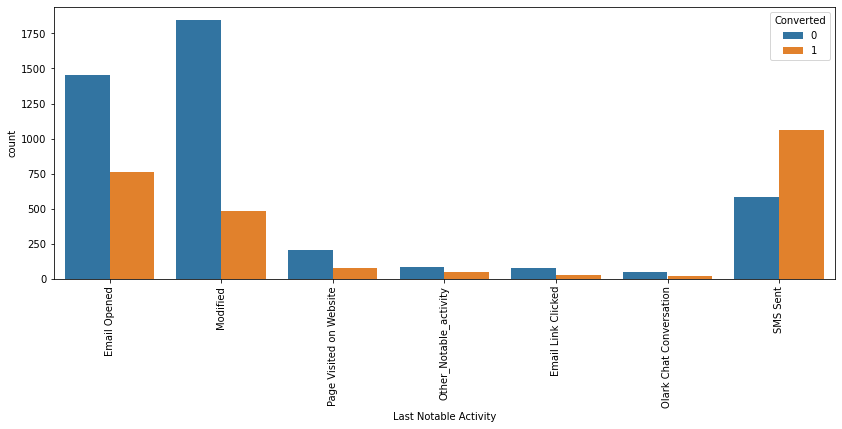

In [1319]:
#visualizing count of Variable based on Converted value

plt.figure(figsize = (14,5))
ax1=sns.countplot(x = "Last Notable Activity", hue = "Converted", data = leads)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
plt.show()

In [1320]:
#checking value counts for variable

leads['Last Notable Activity'].value_counts()

Modified                   2331
Email Opened               2212
SMS Sent                   1643
Page Visited on Website     286
Other_Notable_activity      133
Email Link Clicked          106
Olark Chat Conversation      68
Name: Last Notable Activity, dtype: int64

In [1321]:
#list of columns to be dropped
cols_to_drop

['Country',
 'What matters most to you in choosing a course',
 'Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

In [1322]:
#dropping columns
leads = leads.drop(cols_to_drop,1)
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6779 entries, 1 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             6779 non-null   object 
 1   Lead Source                             6779 non-null   object 
 2   Do Not Email                            6779 non-null   object 
 3   Converted                               6779 non-null   int64  
 4   TotalVisits                             6779 non-null   float64
 5   Total Time Spent on Website             6779 non-null   int64  
 6   Page Views Per Visit                    6779 non-null   float64
 7   Last Activity                           6779 non-null   object 
 8   Specialization                          6779 non-null   object 
 9   What is your current occupation         6779 non-null   object 
 10  Tags                                    6779 non-null   obje

#### Numerical Attributes Analysis:

In [1323]:
#Check the % of Data that has Converted Values = 1:

Converted = (sum(leads['Converted'])/len(leads['Converted'].index))*100
Converted

36.65732408909869

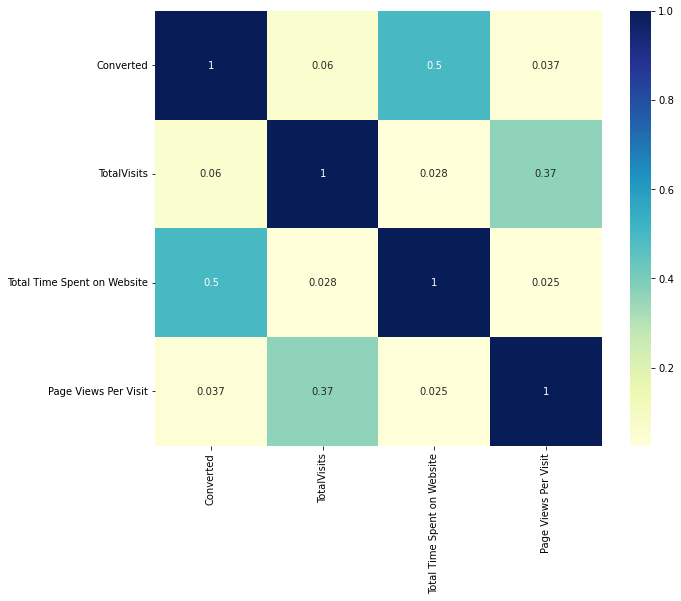

In [1324]:
#Checking correlations of numeric values
# figure size
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(leads.corr(), cmap="YlGnBu", annot=True)
plt.show()

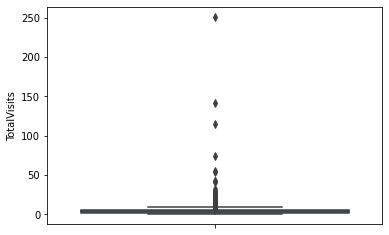

In [1325]:
#Total Visits
#visualizing spread of variable

plt.figure(figsize=(6,4))
sns.boxplot(y=leads['TotalVisits'])
plt.show()

We can see presence of outliers here

In [1326]:
#checking percentile values for "Total Visits"

leads['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    6779.000000
mean        4.553917
std         5.138148
min         0.000000
5%          1.000000
25%         2.000000
50%         4.000000
75%         5.000000
90%         8.000000
95%        11.000000
99%        18.220000
max       251.000000
Name: TotalVisits, dtype: float64

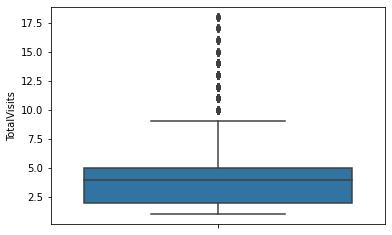

In [1327]:
#Outlier Treatment: Remove top & bottom 1% of the Column Outlier values

Q3 = leads.TotalVisits.quantile(0.99)
leads = leads[(leads.TotalVisits <= Q3)]
Q1 = leads.TotalVisits.quantile(0.01)
leads = leads[(leads.TotalVisits >= Q1)]
sns.boxplot(y=leads['TotalVisits'])
plt.show()

In [1328]:
leads.shape

(6706, 14)

In [1329]:
#checking percentiles for "Total Time Spent on Website"

leads['Total Time Spent on Website'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    6706.000000
mean      631.736206
std       541.763382
min         0.000000
5%         33.000000
25%       171.000000
50%       397.000000
75%      1104.000000
90%      1451.500000
95%      1606.000000
99%      1862.950000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

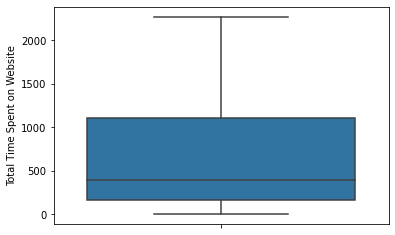

In [1330]:
#visualizing spread of numeric variable

plt.figure(figsize=(6,4))
sns.boxplot(y=leads['Total Time Spent on Website'])
plt.show()

Since there are no major Outliers for the above variable we don't do any Outlier Treatment for this above Column

In [1331]:
#checking spread of "Page Views Per Visit"

leads['Page Views Per Visit'].describe()

count    6706.000000
mean        3.104545
std         1.817244
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

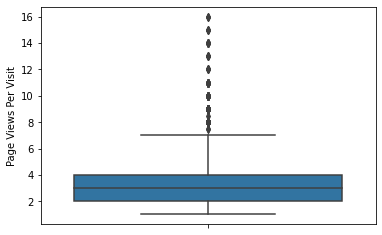

In [1332]:
#visualizing spread of numeric variable

plt.figure(figsize=(6,4))
sns.boxplot(y=leads['Page Views Per Visit'])
plt.show()

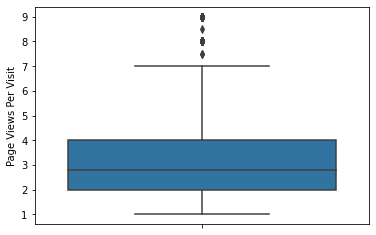

In [1333]:
#Outlier Treatment: Remove top & bottom 1% 

Q3 = leads['Page Views Per Visit'].quantile(0.99)
leads = leads[leads['Page Views Per Visit'] <= Q3]
Q1 = leads['Page Views Per Visit'].quantile(0.01)
leads = leads[leads['Page Views Per Visit'] >= Q1]
sns.boxplot(y=leads['Page Views Per Visit'])
plt.show()

In [1334]:
leads.shape

(6640, 14)

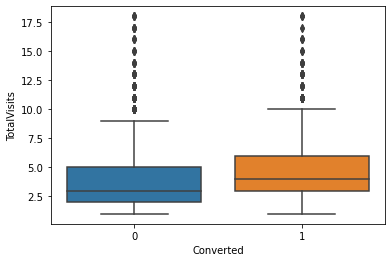

In [1335]:
#checking Spread of "Total Visits" vs Converted variable
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads)
plt.show()

#### Inference

1.Median for converted and not converted leads are the close.

2.Nothng conclusive can be said on the basis of Total Visits

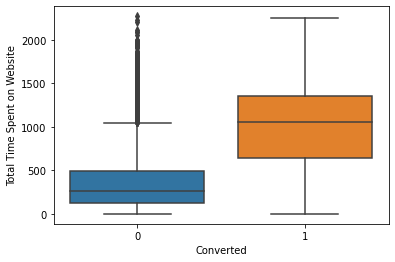

In [1336]:
#checking Spread of "Total Time Spent on Website" vs Converted variable

sns.boxplot(x=leads.Converted, y=leads['Total Time Spent on Website'])
plt.show()

#### Inference

1.Leads spending more time on the website are more likely to be converted.

2.Website should be made more engaging to make leads spend more time.

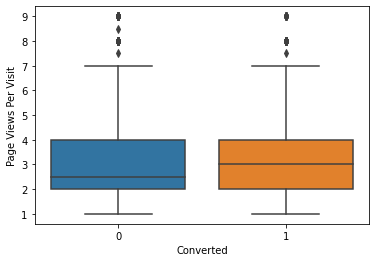

In [1337]:
#checking Spread of "Page Views Per Visit" vs Converted variable

sns.boxplot(x=leads.Converted,y=leads['Page Views Per Visit'])
plt.show()

#### Inference

1.Median for converted and unconverted leads is the same.

2.Nothing can be said specifically for lead conversion from Page Views Per Visit

In [1338]:
#checking missing values in leftover columns/

round(100*(leads.isnull().sum()/len(leads.index)),2)

Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
Tags                                      0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

There are no missing values in the columns to be analyzed further

## Creating Dummy variable 

In [1339]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,Ringing,Mumbai,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,Ringing,Mumbai,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,Will revert after reading the email,Mumbai,No,Modified
6,Landing Page Submission,Google,No,1,2.0,1640,2.0,Email Opened,Management_Specializations,Unemployed,Will revert after reading the email,Mumbai,No,Modified


In [1340]:
leads.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'Tags', 'City', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [1341]:
# Creating a dummy variable for the categorical variables.
dummy = pd.get_dummies(leads[['Lead Origin', 'Lead Source','Last Activity', 'Specialization','What is your current occupation',
       'Tags', 'City','Last Notable Activity']], drop_first=True)



In [1342]:
dummy.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,...,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_Notable_activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [1343]:
# concatinating the results of dummy to the leads dataframe.
leads_final = pd.concat([leads, dummy], axis=1)

In [1344]:
#the final data frame.
leads_final.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,...,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_Notable_activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,...,0,0,0,0,1,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,...,0,0,0,0,1,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,...,0,0,0,0,0,1,0,0,0,0
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,...,0,0,0,0,0,1,0,0,0,0
6,Landing Page Submission,Google,No,1,2.0,1640,2.0,Email Opened,Management_Specializations,Unemployed,...,0,0,0,0,0,1,0,0,0,0


In [1345]:
# We have created dummies for the categorical variables, so we can drop them.
leads_final = leads_final.drop(['Lead Origin', 'Lead Source','Last Activity', 'Specialization','What is your current occupation',
       'Tags', 'City','Last Notable Activity'], 1)

In [1346]:
leads_final.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Google,Lead Source_Olark Chat,...,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_Notable_activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
1,No,0,5.0,674,2.5,No,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,No,1,2.0,1532,2.0,Yes,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,No,0,1.0,305,1.0,No,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,No,1,2.0,1428,1.0,No,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
6,No,1,2.0,1640,2.0,No,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0


#### Converting binary variables (Yes/No) to 0/1

In [1347]:
# List of variables to map.

varlist =  ['Do Not Email','A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the list of variables.
leads_final[varlist] = leads_final[varlist].apply(binary_map)

In [1348]:
leads_final.head()


,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Google,Lead Source_Olark Chat,...,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_Notable_activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1.0,305,1.0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,1,2.0,1428,1.0,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
6,0,1,2.0,1640,2.0,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0


all the data is in numeric form.

## Test and Train split

In [1349]:
from sklearn.model_selection import train_test_split

In [1350]:
# Putting feature variable to X
X = leads_final.drop(['Converted'], axis=1)

X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_Notable_activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
1,0,5.0,674,2.5,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0,2.0,1532,2.0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,2.0,1428,1.0,0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
6,0,2.0,1640,2.0,0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [1351]:
# Putting response variable to y
y = leads_final['Converted']

y.head()

1    0
2    1
3    0
4    1
6    1
Name: Converted, dtype: int64

In [1352]:
# Splitting the data into train and test with ratiio 70:30.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Scaling

In [1353]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4648 entries, 1979 to 7849
Data columns (total 56 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          4648 non-null   int64  
 1   TotalVisits                                           4648 non-null   float64
 2   Total Time Spent on Website                           4648 non-null   int64  
 3   Page Views Per Visit                                  4648 non-null   float64
 4   A free copy of Mastering The Interview                4648 non-null   int64  
 5   Lead Origin_Landing Page Submission                   4648 non-null   uint8  
 6   Lead Origin_Lead Add Form                             4648 non-null   uint8  
 7   Lead Source_Google                                    4648 non-null   uint8  
 8   Lead Source_Olark Chat                                4

In [1354]:
#scaling the variable using standard scaler.
scaler = StandardScaler()

X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_Notable_activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
1979,0,0.668033,1.836717,1.846001,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
6249,0,1.418399,1.230405,-0.225650,1,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
5557,0,1.793583,1.857051,3.712353,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
7865,0,1.793583,-0.645835,3.712353,1,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
8491,0,-0.082334,0.086176,0.601766,0,1,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0


In [1355]:
### Checking the conversion Rate.
convert_rate = (sum(leads_final['Converted'])/len(leads_final['Converted'].index))*100
convert_rate

36.46084337349398

We have the conversion rate of 36%.As per the business demand this should be 80%.

## Finding Correlations.

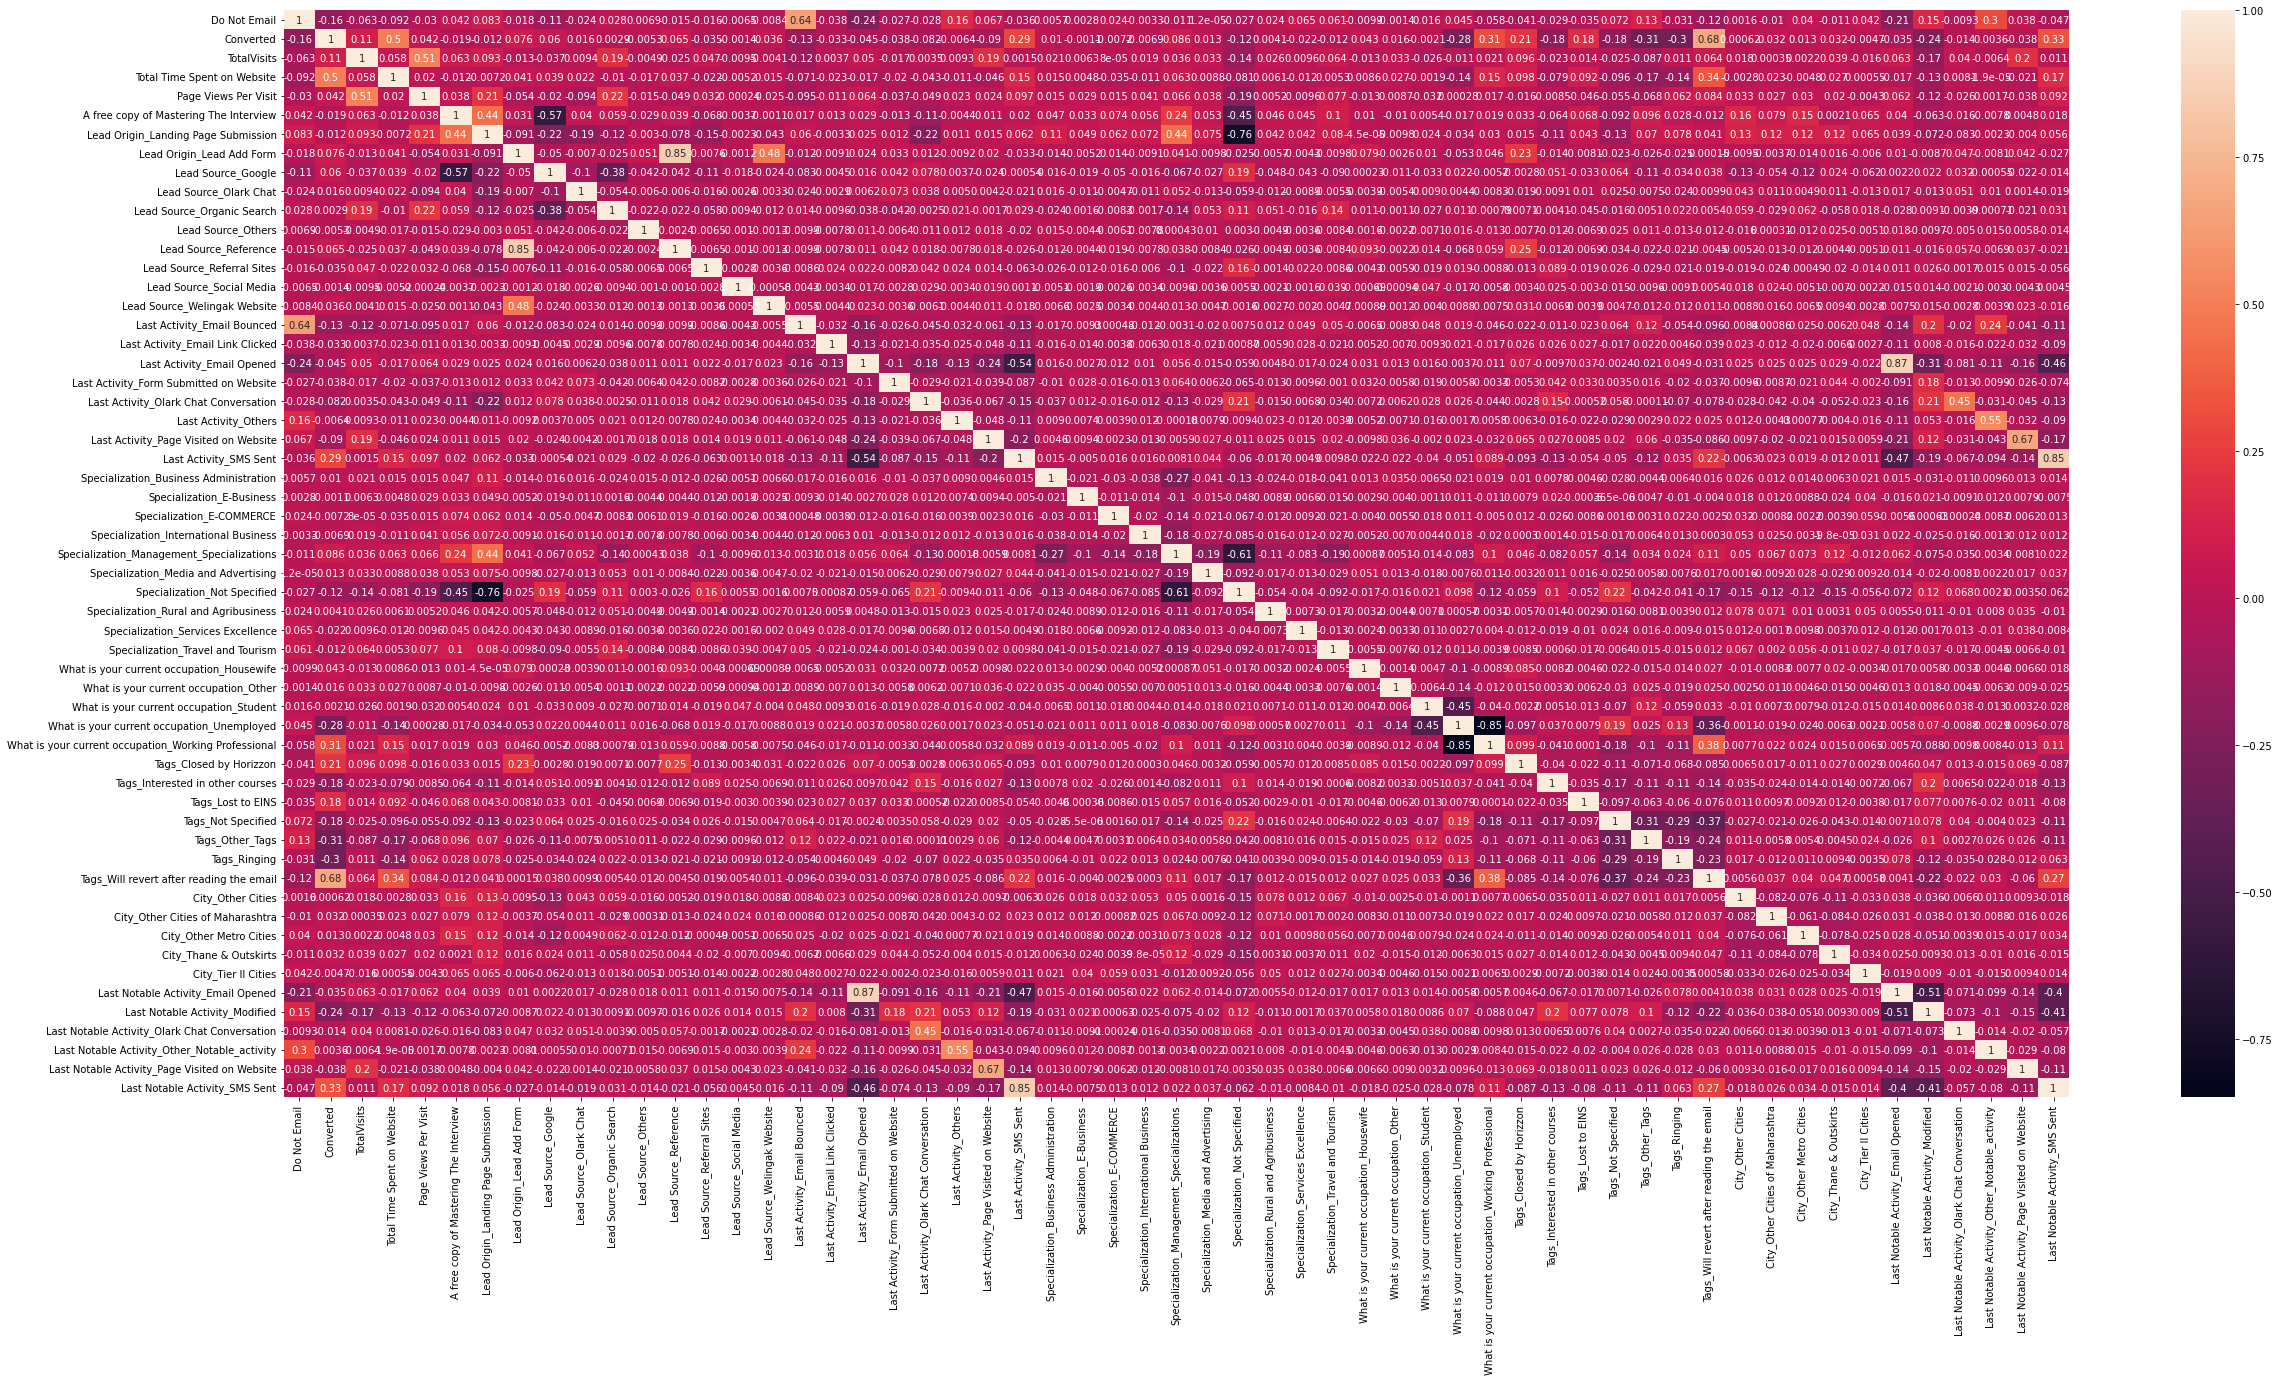

In [1356]:
# Let's see the correlation matrix 
plt.figure(figsize = (40,20))     # Size of the figure
sns.heatmap(leads_final.corr(),annot = True)
plt.show()

# Model Building



Running First Training Model.

In [1357]:
import statsmodels.api as sm

In [1358]:
# Logistic regression model
# Model_1
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4648
Model:                            GLM   Df Residuals:                     4591
Model Family:                Binomial   Df Model:                           56
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -838.11
Date:                Mon, 17 Oct 2022   Deviance:                       1676.2
Time:                        18:51:28   Pearson chi2:                 7.75e+03
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2988      1.710      0.175      0.861      -3.053       3.651
Do Not Email                                            -0.9353      0.369     -2.534      0.011      -1.659      -0.212
TotalVisits                                              0.2167      0.078      2.790      0.005       0.064       0.369
Total Time Spent on Website                              1.1276      0.067     16.755      0.000       0.996       1.259
Page Views Per Visit                                    -0.1673      0.083     -2.008      0.045      -0.331      -0.004
A free copy of Mastering The Interview                  -0.0672      0.190     -0.353      0.724      -0.440       0.306
Lead Origin_Landing Page Submission                     -1.0038      0.298     -3.370      0.001      -1.588      -0.420
Lead Origin_Lead Add Form                               23.5290   2.16e+05      0.000      1.000   -4.23e+05    4.23e+05
Lead Source_Google                                       0.2180      0.195      1.119      0.263      -0.164       0.600
Lead Source_Olark Chat                                  -0.6665      0.537     -1.241      0.214      -1.719       0.386
Lead Source_Organic Search                               0.2553      0.226      1.127      0.260      -0.189       0.699
Lead Source_Others                                       1.0855      1.319      0.823      0.410      -1.499       3.670
Lead Source_Reference                                   -5.7341   2.21e+05  -2.59e-05      1.000   -4.34e+05    4.34e+05
Lead Source_Referral Sites                              -0.0439      0.519     -0.085      0.933      -1.061       0.973
Lead Source_Social Media                                -2.1824      1.927     -1.133      0.257      -5.959       1.594
Lead Source_Welingak Website                             1.6617   2.35e+05   7.06e-06      1.000   -4.61e+05    4.61e+05
Last Activity_Email Bounced                             -0.3281      0.802     -0.409      0.683      -1.900       1.244
Last Activity_Email Link Clicked                         1.5819      0.806      1.962      0.050       0.002       3.162
Last Activity_Email Opened                               0.6747      0.448      1.505      0.132      -0.204       1.553
Last Activity_Form Submitted on Website                  0.6140      0.635      0.967      0.334      -0.631       1.859
Last Activity_Olark Chat Conversation                    0.7029      0.480      1.464      0.143      -0.238       1.644
Last Activity_Others                                    -0.0727      0.750     -0.097      0.923      -1.542       1.397
Last Activity_Page Visited on Website                   -0

 #### Feature Selection Using RFE

In [1359]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [1360]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables.
rfe = rfe.fit(X_train, y_train)

In [1361]:
rfe.support_                     

array([ True, False,  True, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False, False, False, False, False,  True, False, False,
       False,  True])

In [1362]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))           #list of variables that gave True in RFE selection.

[('Do Not Email', True, 1),
 ('TotalVisits', False, 28),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 29),
 ('A free copy of Mastering The Interview', False, 37),
 ('Lead Origin_Landing Page Submission', False, 3),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Source_Google', False, 23),
 ('Lead Source_Olark Chat', False, 4),
 ('Lead Source_Organic Search', False, 22),
 ('Lead Source_Others', False, 8),
 ('Lead Source_Reference', False, 38),
 ('Lead Source_Referral Sites', False, 36),
 ('Lead Source_Social Media', False, 7),
 ('Lead Source_Welingak Website', False, 10),
 ('Last Activity_Email Bounced', False, 16),
 ('Last Activity_Email Link Clicked', False, 15),
 ('Last Activity_Email Opened', False, 11),
 ('Last Activity_Form Submitted on Website', False, 12),
 ('Last Activity_Olark Chat Conversation', False, 14),
 ('Last Activity_Others', False, 34),
 ('Last Activity_Page Visited on Website', False, 27),
 ('Last Activity_SMS Sent', True, 1),
 ('Spec

In [1363]:
col = X_train.columns[rfe.support_]

In [1364]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Others', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_Page Visited on Website',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_International Business',
       'Specialization_Management_Specializations',
       'Specialization_Media and Advertising', 'Specialization_Not Specified',
       'Specialization_Rural and Agribusiness',
       '

##### Assessing the model with StatsModels

In [1365]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4648
Model:                            GLM   Df Residuals:                     4632
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -868.95
Date:                Mon, 17 Oct 2022   Deviance:                       1737.9
Time:                        18:51:32   Pearson chi2:                 6.15e+03
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.5849      0.250     -2.342      0.019      -1.074      -0.096
Do Not Email                                            -1.0865      0.293     -3.705      0.000      -1.661      -0.512
Total Time Spent on Website                              1.1196      0.065     17.182      0.000       0.992       1.247
Lead Origin_Lead Add Form                               23.4985   4.03e+04      0.001      1.000    -7.9e+04    7.91e+04
Last Activity_SMS Sent                                   0.9167      0.260      3.525      0.000       0.407       1.426
Specialization_Travel and Tourism                       -0.9066      0.448     -2.022      0.043      -1.786      -0.028
What is your current occupation_Working Professional     1.3244      0.522      2.540      0.011       0.302       2.347
Tags_Closed by Horizzon                                 26.1270   1.81e+04      0.001      0.999   -3.55e+04    3.55e+04
Tags_Interested in other courses                        -3.0037      0.486     -6.178      0.000      -3.957      -2.051
Tags_Lost to EINS                                        4.2140      0.657      6.410      0.000       2.925       5.503
Tags_Not Specified                                      -0.9173      0.247     -3.709      0.000      -1.402      -0.433
Tags_Other_Tags                                         -3.3436      0.327    -10.238      0.000      -3.984      -2.704
Tags_Ringing                                            -4.3483      0.360    -12.084      0.000      -5.054      -3.643
Tags_Will revert after reading the email                 3.6730      0.322     11.411      0.000       3.042       4.304
Last Notable Activity_Modified                          -0.8845      0.180     -4.920      0.000      -1.237      -0.532
Last Notable Activity_SMS Sent                           1.0995      0.301      3.656      0.000       0.510       1.689
========================================================================================================================
"""

as we can see the P value is very high for 'Lead Origin_Lead Add Form' and 'tags_Closed by Horizzon' so we can drop them.

In [1366]:
#dropping columns with high P value.
col = col.drop('Lead Origin_Lead Add Form',1)

In [1367]:
#Model_building 2

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4648
Model:                            GLM   Df Residuals:                     4633
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -871.03
Date:                Mon, 17 Oct 2022   Deviance:                       1742.1
Time:                        18:51:32   Pearson chi2:                 6.17e+03
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.5770      0.250     -2.311      0.021      -1.066      -0.088
Do Not Email                                            -1.0908      0.293     -3.719      0.000      -1.666      -0.516
Total Time Spent on Website                              1.1226      0.065     17.231      0.000       0.995       1.250
Last Activity_SMS Sent                                   0.9164      0.260      3.523      0.000       0.407       1.426
Specialization_Travel and Tourism                       -0.9095      0.449     -2.028      0.043      -1.789      -0.030
What is your current occupation_Working Professional     1.3268      0.521      2.548      0.011       0.306       2.347
Tags_Closed by Horizzon                                 26.2571   1.85e+04      0.001      0.999   -3.62e+04    3.63e+04
Tags_Interested in other courses                        -3.0065      0.486     -6.183      0.000      -3.960      -2.053
Tags_Lost to EINS                                        4.2162      0.658      6.412      0.000       2.927       5.505
Tags_Not Specified                                      -0.9120      0.247     -3.688      0.000      -1.397      -0.427
Tags_Other_Tags                                         -3.3457      0.327    -10.243      0.000      -3.986      -2.706
Tags_Ringing                                            -4.3499      0.360    -12.087      0.000      -5.055      -3.644
Tags_Will revert after reading the email                 3.6736      0.322     11.411      0.000       3.043       4.305
Last Notable Activity_Modified                          -0.8965      0.180     -4.991      0.000      -1.249      -0.544
Last Notable Activity_SMS Sent                           1.0889      0.301      3.621      0.000       0.500       1.678
========================================================================================================================
"""

In [1368]:
#dropping columns with high P value.
col = col.drop('Tags_Closed by Horizzon',1)

In [1369]:
col = col.drop('Specialization_Travel and Tourism', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website', 'Last Activity_SMS Sent',
       'What is your current occupation_Working Professional',
       'Tags_Interested in other courses', 'Tags_Lost to EINS',
       'Tags_Not Specified', 'Tags_Other_Tags', 'Tags_Ringing',
       'Tags_Will revert after reading the email',
       'Last Notable Activity_Modified', 'Last Notable Activity_SMS Sent'],
      dtype='object')

In [1370]:
#Model_building 3

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4648
Model:                            GLM   Df Residuals:                     4635
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -927.61
Date:                Mon, 17 Oct 2022   Deviance:                       1855.2
Time:                        18:51:32   Pearson chi2:                 6.57e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.8722      0.199      4.377      0.000       0.482       1.263
Do Not Email                                            -1.2188      0.288     -4.225      0.000      -1.784      -0.653
Total Time Spent on Website                              1.1234      0.063     17.734      0.000       0.999       1.248
Last Activity_SMS Sent                                   0.5166      0.249      2.072      0.038       0.028       1.005
What is your current occupation_Working Professional     1.8805      0.445      4.224      0.000       1.008       2.753
Tags_Interested in other courses                        -4.6107      0.457    -10.095      0.000      -5.506      -3.716
Tags_Lost to EINS                                        2.6086      0.633      4.124      0.000       1.369       3.848
Tags_Not Specified                                      -2.3767      0.202    -11.766      0.000      -2.773      -1.981
Tags_Other_Tags                                         -4.7898      0.296    -16.203      0.000      -5.369      -4.210
Tags_Ringing                                            -5.7316      0.338    -16.962      0.000      -6.394      -5.069
Tags_Will revert after reading the email                 2.0963      0.276      7.583      0.000       1.554       2.638
Last Notable Activity_Modified                          -0.6430      0.162     -3.970      0.000      -0.960      -0.326
Last Notable Activity_SMS Sent                           1.3620      0.293      4.653      0.000       0.788       1.936
========================================================================================================================
"""

the P value of all the variables is in acceptable range so we can move forward with VIF.

In [1371]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [1372]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Last Notable Activity_SMS Sent,6.15
2,Last Activity_SMS Sent,5.85
10,Last Notable Activity_Modified,2.16
9,Tags_Will revert after reading the email,1.71
6,Tags_Not Specified,1.46
7,Tags_Other_Tags,1.30
3,What is your current occupation_Working Profes...,1.27
8,Tags_Ringing,1.20
4,Tags_Interested in other courses,1.19
1,Total Time Spent on Website,1.17


the VIF of 'Last Notable Activity_SMS Sent' is very high ie. 6.15, so dropping this feature.

In [1373]:
col = col.drop('Last Notable Activity_SMS Sent', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website', 'Last Activity_SMS Sent',
       'What is your current occupation_Working Professional',
       'Tags_Interested in other courses', 'Tags_Lost to EINS',
       'Tags_Not Specified', 'Tags_Other_Tags', 'Tags_Ringing',
       'Tags_Will revert after reading the email',
       'Last Notable Activity_Modified'],
      dtype='object')

In [1374]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4648
Model:                            GLM   Df Residuals:                     4636
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -938.81
Date:                Mon, 17 Oct 2022   Deviance:                       1877.6
Time:                        18:51:33   Pearson chi2:                 6.12e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.0332      0.196      5.274      0.000       0.649       1.417
Do Not Email                                            -1.1948      0.289     -4.139      0.000      -1.761      -0.629
Total Time Spent on Website                              1.1381      0.063     18.077      0.000       1.015       1.262
Last Activity_SMS Sent                                   1.4964      0.129     11.583      0.000       1.243       1.750
What is your current occupation_Working Professional     1.8338      0.438      4.189      0.000       0.976       2.692
Tags_Interested in other courses                        -4.5763      0.456    -10.045      0.000      -5.469      -3.683
Tags_Lost to EINS                                        2.7168      0.637      4.264      0.000       1.468       3.966
Tags_Not Specified                                      -2.4183      0.201    -12.005      0.000      -2.813      -2.024
Tags_Other_Tags                                         -4.7697      0.294    -16.215      0.000      -5.346      -4.193
Tags_Ringing                                            -5.6556      0.333    -16.959      0.000      -6.309      -5.002
Tags_Will revert after reading the email                 2.1120      0.277      7.621      0.000       1.569       2.655
Last Notable Activity_Modified                          -1.0873      0.136     -8.006      0.000      -1.354      -0.821
========================================================================================================================
"""

the P value is zero for all the features.

the most impacting variables are:
1. Tags_Lost to EINS
2. Tags_Will revert after reading the emai
3. What is your current occupation_Working Professional

In [1375]:
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Last Notable Activity_Modified,1.69
9,Tags_Will revert after reading the email,1.64
2,Last Activity_SMS Sent,1.55
6,Tags_Not Specified,1.43
3,What is your current occupation_Working Profes...,1.26
7,Tags_Other_Tags,1.26
1,Total Time Spent on Website,1.17
4,Tags_Interested in other courses,1.16
8,Tags_Ringing,1.16
0,Do Not Email,1.15


as we can see the VIF value of all the fetures is less. so the model looks good.

In [1376]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1979    0.900400
6249    0.503800
5557    0.164793
7865    0.004691
8491    0.010726
2573    0.043973
474     0.029856
4477    0.967292
1952    0.065064
1816    0.001361
dtype: float64

In [1377]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.90039967, 0.50380024, 0.1647929 , 0.00469069, 0.01072551,
       0.04397269, 0.02985612, 0.9672919 , 0.06506356, 0.0013607 ])

##### Creating a dataframe with the actual converted flag and the predicted probabilities

In [1378]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Convert_Prob':y_train_pred})

y_train_pred_final.head()

,Converted,Convert_Prob
0,1,0.900400
1,0,0.503800
2,0,0.164793
3,0,0.004691
4,0,0.010726


In [1379]:
# choosing cutoff value as 0.7 for prediction.
# Creating new column 'predicted' with 1 if Convert_Prob > 0.7 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.7 else 0)
y_train_pred_final.head()

,Converted,Convert_Prob,predicted
0,1,0.900400,1
1,0,0.503800,0
2,0,0.164793,0
3,0,0.004691,0
4,0,0.010726,0


In [1380]:
from sklearn import metrics

In [1381]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9141566265060241


In [1382]:
# Let's take a look at the confusion matrix  
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[2890,   71],
       [ 328, 1359]], dtype=int64)

In [1383]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [1384]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8055720213396562

sensitivity of 0.80 is good value.

In [1385]:
# Let us calculate specificity
TN / float(TN+FP)

0.9760216143194866

we are getting specificity of 0.97 which is very high .

In [1386]:
# Calculate false postive rate - predicting converted when lead does not have converted
print(FP/ float(TN+FP))

0.02397838568051334


In [1387]:
# positive predictive value 
print (TP / float(TP+FP))

0.9503496503496504


In [1388]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8980733374766936


on choosing the cutoff value as 0.7 we are getting the following metrics value:

    Accuracy : 91%
    
    Sensitivity: 80.5%
    
    Specificity: 97.6 %

specificity is very high so we will find the optimum cut off.

# Plotting the ROC Curve

In [1389]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [1390]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Convert_Prob, drop_intermediate = False )

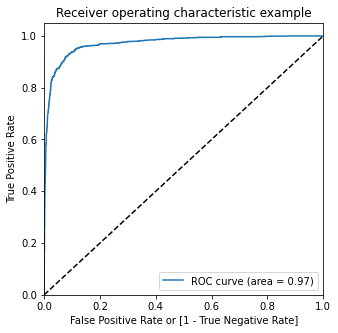

In [1391]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Convert_Prob)

In the ROC plot it can be seen that the curve is going close to Y axis and near the value of 1. 

Also the area under the curve is very high. so the model is reliable.

# Finding Optimal Cutoff Point

for a balanced Sensitivity and Specificity we need to find the optimal cutoff point.

In [1392]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Convert_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.900400,1,1,1,1,1,1,1,1,1,1,1
1,0,0.503800,0,1,1,1,1,1,1,0,0,0,0
2,0,0.164793,0,1,1,0,0,0,0,0,0,0,0
3,0,0.004691,0,1,0,0,0,0,0,0,0,0,0
4,0,0.010726,0,1,0,0,0,0,0,0,0,0,0


In [1393]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy  sensitivity  specificity
0.0   0.0  0.362952     1.000000     0.000000
0.1   0.1  0.840577     0.970954     0.766295
0.2   0.2  0.908348     0.950800     0.884161
0.3   0.3  0.919105     0.921755     0.917595
0.4   0.4  0.921687     0.896266     0.936170
0.5   0.5  0.924484     0.873740     0.953394
0.6   0.6  0.922978     0.841138     0.969605
0.7   0.7  0.914157     0.805572     0.976022
0.8   0.8  0.898236     0.751630     0.981763
0.9   0.9  0.870482     0.662715     0.988855


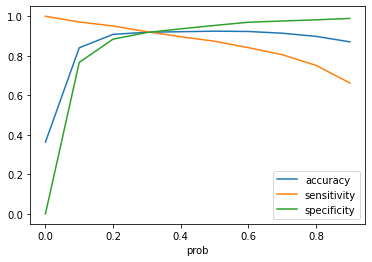

In [1394]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensitivity','specificity'])
plt.show()

form the above we can conclude that the cutoff of 0.3 is optimal as it shows the balance between all the metrics. so we can take 0.3 as cutoff probabililty.

In [1395]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Convert_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Convert_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.900400,1,1,1,1,1,1,1,1,1,1,1,1
1,0,0.503800,0,1,1,1,1,1,1,0,0,0,0,1
2,0,0.164793,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.004691,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.010726,0,1,0,0,0,0,0,0,0,0,0,0


In [1396]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.919104991394148

In [1397]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[2717,  244],
       [ 132, 1555]], dtype=int64)

In [1398]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [1399]:
# Calculating the sensitivity
print(TP/(TP+FN))

0.921754593953764


In [1400]:
# Calculating the specificity
print(TN/(TN+FP))

0.9175954069571091


In [1401]:
# Calculate false postive rate - predicting converted when lead does not have converted
print(FP/ float(TN+FP))

0.08240459304289091


In [1402]:
# positive predictive value 
print (TP / float(TP+FP))

0.8643690939410784


In [1403]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9536679536679536


with cutoff of 0.3 we are getting the sensitivity of 0.92 and specificity of 0.91 which are high and balanced.

## Precision and Recall

In [1404]:
#Looking at the confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[2890,   71],
       [ 328, 1359]], dtype=int64)

In [1405]:
# Precision
precision=confusion[1,1]/(confusion[0,1]+confusion[1,1])
precision

0.9503496503496504

In [1406]:
# Recall
recall=confusion[1,1]/(confusion[1,0]+confusion[1,1])
recall

0.8055720213396562

In [1407]:
from sklearn.metrics import precision_score, recall_score

In [1408]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.9503496503496504

In [1409]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8055720213396562

In [1410]:
from sklearn.metrics import precision_recall_curve

In [1411]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       1
 1       0
 2       0
 3       0
 4       0
        ..
 4643    0
 4644    0
 4645    0
 4646    1
 4647    1
 Name: Converted, Length: 4648, dtype: int64,
 0       1
 1       0
 2       0
 3       0
 4       0
        ..
 4643    0
 4644    0
 4645    0
 4646    1
 4647    1
 Name: predicted, Length: 4648, dtype: int64)

In [1412]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Convert_Prob)

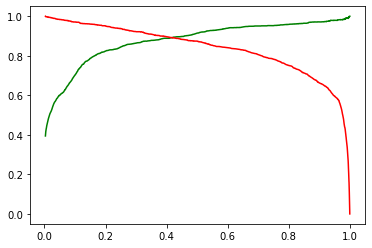

In [1413]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

in the above graph lines cut each other at 0.4 

In [1414]:
## Calculating the F1 score
F1 = 2*(precision*recall)/(precision+recall)
F1

0.8719923002887392

we are getting a good F1 score of 0.87

# Making predictions on the test set

scalling the test data set.

In [1415]:
scaler = StandardScaler()

X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.fit_transform(X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])

X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_Notable_activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
8970,0,-1.144209,-0.560701,-1.266390,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
8280,0,-0.783851,-0.236439,-0.628396,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
6941,0,-0.783851,-1.021301,-1.266390,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
7343,1,4.621518,0.028867,-0.545456,0,1,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
3734,0,-0.063135,-0.582810,0.647593,1,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [1416]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Last Activity_SMS Sent,What is your current occupation_Working Professional,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not Specified,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_Modified
8970,0,-0.560701,0,0,1,0,0,0,0,0,1
8280,0,-0.236439,0,0,0,0,1,0,0,0,0
6941,0,-1.021301,0,0,1,0,0,0,0,0,0
7343,1,0.028867,0,0,0,0,0,0,0,1,1
3734,0,-0.582810,0,0,0,0,1,0,0,0,1


In [1417]:
X_test_sm = sm.add_constant(X_test)

In [1418]:
y_test_pred = res.predict(X_test_sm)


In [1419]:
y_test_pred[:10]

8970    0.005124
8280    0.160533
6941    0.008964
7343    0.710096
3734    0.041654
7889    0.908205
837     0.008835
8227    0.017819
7245    0.999352
8622    0.937447
dtype: float64

In [1420]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [1421]:
# Let's see the head
y_pred_1.head()

,0
8970,0.005124
8280,0.160533
6941,0.008964
7343,0.710096
3734,0.041654


In [1422]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [1423]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [1424]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [1425]:
y_pred_final.head()

,Converted,0
0,0,0.005124
1,0,0.160533
2,0,0.008964
3,0,0.710096
4,0,0.041654


In [1426]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Convert_Prob'})

In [1427]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Converted,Convert_Prob
0,0,0.005124
1,0,0.160533
2,0,0.008964
3,0,0.710096
4,0,0.041654


In [1428]:
y_pred_final['final_predicted'] = y_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.3 else 0)

In [1429]:
y_pred_final.head()

,Converted,Convert_Prob,final_predicted
0,0,0.005124,0
1,0,0.160533,0
2,0,0.008964,0
3,0,0.710096,1
4,0,0.041654,0


In [1430]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.9161646586345381

In [1431]:
# Creating confusion matrix 
confusion3 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted)
confusion3

array([[1150,  108],
       [  59,  675]], dtype=int64)

In [1432]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [1433]:
# Let's see the sensitivity of our logistic regression model
print(TP / float(TP+FN))

0.9196185286103542


In [1434]:
# Let us calculate specificity
print(TN / float(TN+FP))

0.9141494435612083


In [1435]:
# Calculate false postive rate 
print(FP/ float(TN+FP))

0.08585055643879173


In [1436]:
# positive predictive value 
print (TP / float(TP+FP))

0.8620689655172413


In [1437]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9511993382961125


In [1438]:
Precision = confusion3[1,1]/(confusion3[0,1]+confusion3[1,1])
Precision

0.8620689655172413

In [1439]:
Recall = confusion3[1,1]/(confusion3[1,0]+confusion3[1,1])
Recall

0.9196185286103542

In [1440]:
F1 = 2*(Precision*Recall)/(Precision+Recall)
F1

0.8899143045484509

Comparing the train and test.


Train Data:

Accuracy : 91.9 %

Sensitivity : 92.1 %

Specificity : 91.7 %
    

Test Data:

Accuracy : 91.6 %

Sensitivity : 91.6 %

Specificity : 91.4 %


## Calculating Lead Score.



In [1441]:
y_pred_final.head()


,Converted,Convert_Prob,final_predicted
0,0,0.005124,0
1,0,0.160533,0
2,0,0.008964,0
3,0,0.710096,1
4,0,0.041654,0


In [1442]:
y_pred_final['Lead Score']=round(y_pred_final['Convert_Prob']*100,2)
y_pred_final.head()

,Converted,Convert_Prob,final_predicted,Lead Score
0,0,0.005124,0,0.51
1,0,0.160533,0,16.05
2,0,0.008964,0,0.90
3,0,0.710096,1,71.01
4,0,0.041654,0,4.17


on the basis of the conversion probability the leands has been assigned with the lead score. 

higher lead score make it a hot lead which has high probability of conversion.